In [1]:
import networkx as nx
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2.)

## Half Synchronization Test

### 1) Complete Graph

In [3]:
nxg = nx.complete_graph(10)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))
natfreqs

array([0.46159061, 0.46159061, 0.46159061, 0.46159061, 0.46159061,
       0.46159061, 0.46159061, 0.46159061, 0.46159061, 0.46159061])

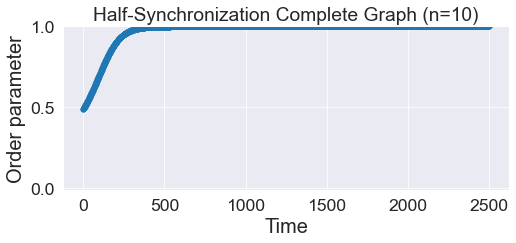

In [4]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.75, dt=0.01, T=25, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Complete Graph (n=10)');

### 2)  [Karate Club Graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

In [5]:
nxg = nx.karate_club_graph()
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))

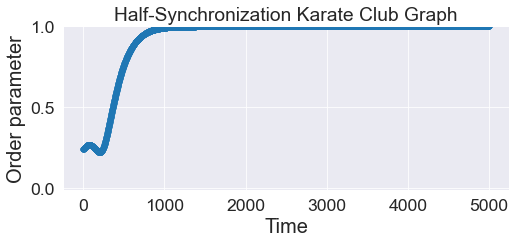

In [6]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.5, dt=0.01, T=50, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Karate Club Graph');

### 3) Uniformly Random Tree

In [7]:
tree = nx.random_tree(n=25)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(tree.nodes()))
print(nx.forest_str(tree, sources=[0]))

╙── 0
    └── 22
        └── 23
            ├── 16
            ├── 20
            │   └── 11
            │       └── 14
            └── 15
                ├── 1
                │   └── 12
                │       └── 2
                │           ├── 6
                │           └── 17
                └── 3
                    ├── 8
                    ├── 7
                    │   ├── 4
                    │   │   └── 5
                    │   └── 9
                    ├── 19
                    └── 24
                        └── 10
                            ├── 18
                            └── 13
                                └── 21


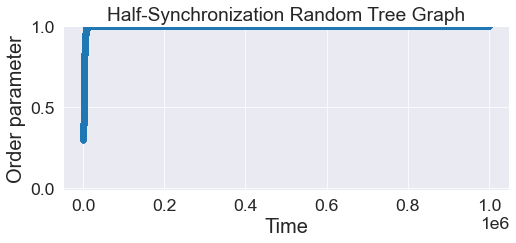

In [8]:
adj_mat = nx.to_numpy_array(tree)
model = Kuramoto(coupling=0.5, dt=0.01, T=10000, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Random Tree Graph');